In [1]:
#!/usr/bin/python
#dbr 01/22/2025

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.cm as cm
import seaborn as sns

sns.set_style("ticks")



In [2]:
#get other info for each ppts

df = pd.read_csv('data/wideout.csv')

clindf = df.groupby('short_id').first().reset_index()

df.head()

,Unnamed: 0,short_id,agemo_at_ART,f/m,ARTregimen,time_ART_mo,log10VL,cens_vl,log10CD4,log10int,cens_intact,log10def,log10ratio
0,0,1,6.279452,0.0,0.0,1.380822,4.094646,0,NaN,3.091223,0,3.242724,-0.151501
1,1,1,6.279452,0.0,0.0,3.320548,2.732394,0,NaN,NaN,0,NaN,NaN
2,2,1,6.279452,0.0,0.0,5.523288,2.633468,0,3.240799,2.695703,0,2.971935,-0.276233
3,3,1,6.279452,0.0,0.0,8.284932,2.638489,0,NaN,NaN,0,NaN,NaN
4,4,1,6.279452,0.0,0.0,13.873973,2.667453,0,NaN,NaN,0,NaN,NaN


In [3]:
#info for TCR sequence participants

spidTCR=[49,73,78,116,134] #short ids

ts=[41,99,40,98,43,99,41,96,40,96] #sample months

#not naive data
fns=[
    '49_M41_NN.csv',
    '49_M99_NN.csv',
    '73_M40_NN.csv',
    '73_M98_NN.csv',
    '78_M43_NN.csv',
    '78_M99_NN.csv',
    '116_M41_NN.csv',
    '116_M96_NN.csv',
    '134_M40_NN.csv',
    '134_M96_NN.csv'
]


In [4]:
#function to calculate ecology

def calc_ecol(rsa):
    
    N = sum(rsa)
    R = sum(rsa>0)

    #now quickly look at ecology at second time point
    maxcl = max(rsa) #max clone size
    fcl = np.sum(rsa[rsa>1]) #fraction clonal (non-singleton)
    
    pa = rsa[rsa>0]/N
    
    D0=R/N
    D1=np.exp(-np.sum(pa*np.log(pa)))/N
    D2=1/np.sum(pa**2)/N
    
    return N,R,D0,D1,D2

#N,R,D0,D1,D2 = calc_ecol(rsa)

In [5]:
czTCR=['indigo','crimson','pink','purple','teal']


54988 20511 48837 18299


/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in divide
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in log
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


61288 22735 48022 18412


/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in divide
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in log
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


53569 4904 45036 4257


/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in divide
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in log
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


52832 23560 40680 17284


/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in divide
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in log
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


51902 7445 44719 6433


/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in divide
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/725507927.py:78: RuntimeWarning: divide by zero encountered in log
  rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip])
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


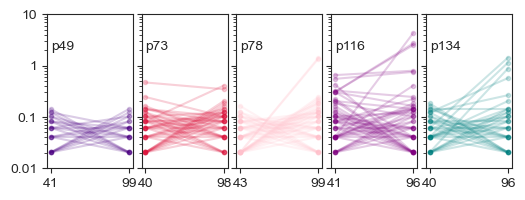

In [8]:
# get rate change in pa

set0to1=False #what to do with zero abundance observations?
global_ss=True #keep same sample size for everyone, smallest 4900

rcl=[]; rcstats=[] #rate change lists
foldchangel=[]
ecol_t1t2=[]
ecol_dynamics=[]
ssl=[]
appears_l=[]; disappears_l=[]; persists_l=[]

fig,axs=plt.subplots(1,5,figsize=(6,2),sharex=False,sharey=True)

original_l=[]

for ip,pid in enumerate(spidTCR):
    
    df1 = pd.read_csv('data/cleanTCR/'+fns[2*ip]) 
    df2 = pd.read_csv('data/cleanTCR/'+fns[2*ip+1]) 
    
    #resample these to same!
    N1=np.sum(df1['templates']); #sample size originally
    N2=np.sum(df2['templates']); #sample size originally
    
    R1=len(df1['templates'])
    R2=len(df2['templates'])
    
    original_l.append([N1,R1,N2,R2])
    
    print(N1,N2,R1,R2)
    df1['pa'] = df1['templates']/np.sum(df1['templates']) #original proportional abundance
    df2['pa'] = df2['templates']/np.sum(df2['templates']) #original proportional abundance
        
    if global_ss:
        ss=4900 #use global minimum
    else:
        ss=np.min([N1,N2]) #use minimum from this ppt
    ssl.append(ss)
    
    #resample to same size!
    df1['rsa'] = np.random.multinomial(n=ss,pvals=df1['pa']) #resampled abundance
    df2['rsa'] = np.random.multinomial(n=ss,pvals=df2['pa']) #resampled abundance

    dt12 = pd.merge(df1, df2, how='outer', on=['extended_rearrangement']) #choose this one for only those found at both

    lod=0 #can be zero!
    #lod=1/ss
    #dt12 = dt12.dropna() 
    dt12 = dt12.fillna(lod) #assume 0 is just undetectable
    
    dt12 = dt12[(dt12['rsa_x'] != 0) | (dt12['rsa_y'] != 0)] #drop rows where both are zero (ie one is nonzero)

    #collect those that either appeared, disappeared, or persisted
    appears_l.append(dt12[(dt12['rsa_x'] == 0) & (dt12['rsa_y'] > 0)]['rsa_y'])
    disappears_l.append(dt12[(dt12['rsa_x'] > 0) & (dt12['rsa_y'] == 0)]['rsa_x'])
    persists_l.append(dt12[(dt12['rsa_x'] > 0) & (dt12['rsa_y'] > 0)][['rsa_x','rsa_y']])
    
    #want total number of types persisting
    clones_a=len(appears_l[ip])
    clones_d=len(disappears_l[ip])
    clones_p=len(persists_l[ip])

    #want total number of types persisting
    cells_a=sum(appears_l[ip])
    cells_d=sum(disappears_l[ip])
    cells_p=sum(persists_l[ip]['rsa_y'])-sum(persists_l[ip]['rsa_x'])
    
    foldchangel.append(persists_l[ip]['rsa_y']/persists_l[ip]['rsa_x'])
    
    #also track fold changes by 
    pai=dt12['rsa_x'].values/ss; paf=dt12['rsa_y'].values/ss; 
    #pai[pai==0]=1/ss; paf[paf==0]=1/ss #assuming LOD is 1/sample size
    
    #assume exponential model, pF = p0*exp(r*Dt), so calc is: r = ln(pF/p0)/Dt
    #or alternatively assume linear
    #rc = (paf-pai)/(ts[2*ip+1]-ts[2*ip]) 
    rc = np.log(paf/pai)/(ts[2*ip+1]-ts[2*ip]) 
    rcstats.append([np.mean(rc),np.std(rc)])
    rcl.append(rc)
    
    N_t1,R_t1,D0_t1,D1_t1,D2_t1 = calc_ecol(dt12['rsa_x'])
    N_t2,R_t2,D0_t2,D1_t2,D2_t2 = calc_ecol(dt12['rsa_y'])
    
    #add to big lists
    ecol_t1t2.append([N_t1,R_t1,D0_t1,D1_t1,D2_t1,N_t2,R_t2,D0_t2,D1_t2,D2_t2])
    ecol_dynamics.append([pid,ts[2*ip],ts[2*ip+1],clones_a,clones_d,clones_p,cells_a,cells_d,cells_p,np.mean(rc),np.std(rc)])
    
    ### PLOT
    rsas = dt12[['rsa_x','rsa_y']]
    #axs[ip].boxplot([(rsas['rsa_x']+1)/ss,(rsas['rsa_y']+1)/ss],positions=[0,1],showfliers=False,widths=0.7)
    
    rsas = rsas.drop_duplicates() #just plot unique rows as lines
    for i in range(len(rsas)):
        axs[ip].semilogy([0,1],[(rsas['rsa_x'].iloc[i]+1)/ss*100,(rsas['rsa_y'].iloc[i]+1)/ss*100],marker='.',
                         color=czTCR[ip],alpha=0.2)

    axs[ip].annotate('p'+str(pid),[0,2],fontsize=10)

    axs[ip].set_xticks([0,1],[ts[2*ip],ts[2*ip+1]])
#plt.ylim([-4,20])
#axs[2].set_xlabel('Months on ART')
#plt.ylim([2e-5,5e-2])
#plt.xlim([-0.1,1.1])
axs[0].set_yticks([1e-2,1e-1,1,10])
axs[0].set_yticklabels(['0.01','0.1','1','10'])
#axs[0].set_ylabel('TCRβ proportional \n abundance')
plt.subplots_adjust(wspace=0.1)
plt.savefig('figures/TCR-allclones.svg',dpi=600)


In [9]:
#R/N for tp 1
np.array(original_l)[:,1]/np.array(original_l)[:,0]

array([0.88813923, 0.78354653, 0.84071011, 0.76998789, 0.86160456])

In [10]:
#R/N for tp 2
np.array(original_l)[:,3]/np.array(original_l)[:,2]

array([0.89215543, 0.80985265, 0.86806688, 0.7336163 , 0.86406985])

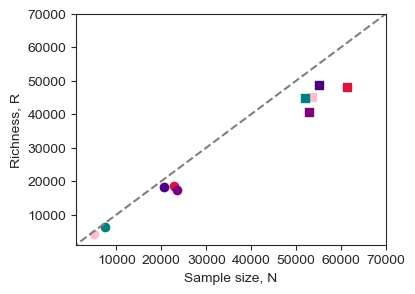

In [11]:
#look at R and N across people

plt.figure(figsize=(4,3))

for i in range(5):
    plt.scatter(original_l[i][0],original_l[i][1],marker='s',color=czTCR[i])
    plt.scatter(original_l[i][2],original_l[i][3],marker='o',color=czTCR[i])
    
plt.plot([1,1e5],[1,1e5],ls='--',color='gray')

plt.xlim([1e3,7e4])
plt.ylim([1e3,7e4])

plt.xlabel('Sample size, N')
plt.ylabel('Richness, R')
plt.savefig('figures/TCR-allclones_RvsN.pdf',dpi=600)


mode median mean
1.0 1.0 1.1644654088050312
1.0 1.0 1.3288224506974506
1.0 1.0 1.8704248366013072
1.0 1.0 3.3500633140460416
1.0 1.0 3.0866161616161616


/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_23607/3047705918.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


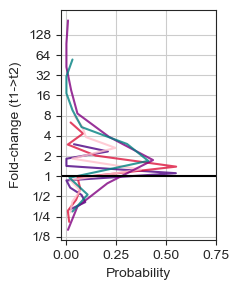

In [12]:
#Fold changes, also flipped y axis
print('mode','median','mean')

plt.figure(figsize=(2.5,3))
for i in range(5):
    #plt.subplot(211)
    
    x,y = np.histogram(np.log2(foldchangel[i]))#,bins=np.arange(-5,5,1))

    print(st.mode(foldchangel[i])[0],np.median(foldchangel[i]),np.mean(foldchangel[i]))
    plt.plot(x/sum(x),y[1:],alpha=0.8,color=czTCR[i])#,marker='o')
        
plt.yticks(np.arange(-3,8,1),['1/8','1/4','1/2','1','2','4','8','16','32','64','128'])
plt.axhline(0,color='k')
plt.xlabel('Probability')
plt.xticks(np.arange(0,1,0.25))
plt.ylabel('Fold-change (t1->t2)')
plt.grid('on')
plt.tight_layout()
plt.savefig('figures/TCRfold-observed.svg',dpi=600)

plt.tight_layout()

In [15]:
ecol_df = pd.DataFrame(ecol_dynamics,columns=['short_id','t1','t2','clones_appear','clones_disappear','clones_persist',
                                      'cells_appear','cells_disappear','cells_persist',
                                      'mean_ratechange','std_ratechange'])

In [16]:
for i in range(5):
    tdf=ecol_df[ecol_df['short_id']==spidTCR[i]].iloc[0]
    print(tdf['clones_persist']/ss)

0.010816326530612244
0.029387755102040815
0.020816326530612245
0.025918367346938774
0.013469387755102041


In [17]:
#get mean and sd rates from monolix

#go through and get individual estimates

pdf=pd.read_csv('monolix/splitV<1/IndividualParameters/estimatedIndividualParameters.txt')
pdf = pdf[['id','thV1_mean','thV1_sd', 'thV2_mean','thV2_sd']]

pdf=pdf.rename(columns={'thV1_mean':'RNA<1(1)',
                        'thV1_sd':'RNA<1(1)_sd',
                        'thV2_mean':'RNA<1(2)',
                         'thV2_sd':'RNA<1(2)_sd'})

thnames = ['RNA>1','Intact<1','Defective<1','Intact>1','Defective>1','CD4<1','CD4>1']

for im, mname in enumerate(['splitV>1','splitI<1','splitD<1','splitI>1','splitD>1','splitS<1','splitS>1']):
    pdfi = pd.read_csv('monolix/'+mname+'/IndividualParameters/estimatedIndividualParameters.txt')
    pdfi = pdfi[['id','thV1_mean','thV1_sd']]
    pdfi = pdfi.rename(columns={'thV1_mean': thnames[im],'thV1_sd': thnames[im]+'_sd' })

    pdf = pd.merge(pdf,pdfi,on='id',how='outer')

pdf.head()

pdf['short_id']=pdf['id']
pdf.columns

Index(['id', 'RNA<1(1)', 'RNA<1(1)_sd', 'RNA<1(2)', 'RNA<1(2)_sd', 'RNA>1',
       'RNA>1_sd', 'Intact<1', 'Intact<1_sd', 'Defective<1', 'Defective<1_sd',
       'Intact>1', 'Intact>1_sd', 'Defective>1', 'Defective>1_sd', 'CD4<1',
       'CD4<1_sd', 'CD4>1', 'CD4>1_sd', 'short_id'],
      dtype='object')

In [18]:
#merge TCR ecology and individual estimates
mdf = pd.merge(pdf,ecol_df,on='short_id',how='inner')


/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/Users/dreeves/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/dreeves/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


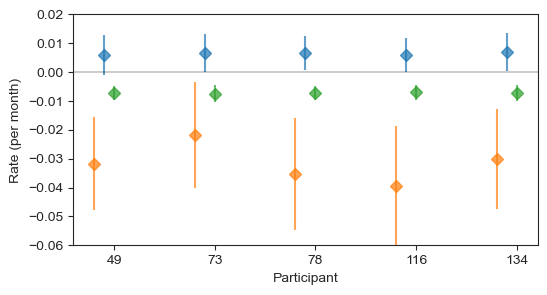

In [19]:
#plot differences
jit=0.02

plt.figure(figsize=(6,3))
czl=['tab:orange','tab:blue','tab:green','k']
for io,o in enumerate(['Intact>1', 'Defective>1', 'CD4>1']):
    plt.errorbar(np.arange(5)+io/10,-mdf[o],yerr=1.96*mdf[o+'_sd'],ls='',marker='D',color=czl[io],label=o,alpha=0.7)

for i in range(5):
    #plt.scatter(np.random.normal(i+4/10,jit,len(rcl[i])),rcl[i],c='gray',alpha=0.1,s=1)
    plt.errorbar(i+4/10,np.mean(rcl[i]),yerr=1.96*np.std(rcl[i]),ls='',marker='o',color=czTCR[i],alpha=0.7,label='TCR clonotypes')
    
    #plt.boxplot(np.log10(foldchangel[i]),positions=[i],showmeans=False,showfliers=False)
#plt.semilogy()
#plt.yticks(np.log10([1/128,1/64,1/32,1/16,1/8,1/4,1/2,1,2,4,8,16,32,64,128]),['1/128','1/64','1/32','1/16','1/8','1/4','1/2','1','2','4','8','16','32','64','128'])
#plt.axhline(0,ls='--',color='gray',alpha=0.5)
plt.xticks(np.arange(5)+0.2,spidTCR)
#plt.tight_layout()

#plt.legend(loc=2,ncol=2)
plt.xlabel('Participant')
plt.ylabel('Rate (per month)')
plt.ylim([-0.06,0.02])
plt.axhline(0,color='k',alpha=0.2)
plt.savefig('figures/TCR-comparerates.svg',dpi=600)
